In [43]:
import pandas as pd 
import numpy as np
calendario = pd.read_csv('../data/calendarioMadrid.csv' , encoding= 'latin-1')
clima1 = pd.read_csv('../data/temperaturaMadrid.csv')
clima2 = pd.read_csv('../data/temperaturaMadrid1.csv')
metro = pd.read_csv('../data/datosMetroMes.csv')

In [44]:
clima = clima2.append(clima1).drop_duplicates()

In [45]:
clima['mes'] = clima['fecha'].apply(lambda x : x.split('/')[1])
clima['ano'] = clima['fecha'].apply(lambda x : x.split('/')[2])
clima.drop(['fecha','indicativo','nombre','altitud','provincia','horatmin','horatmax','horaracha','horaPresMax'],axis = 1, inplace= True)
clima1 = clima.groupby(['mes','ano']).mean().reset_index()
clima2 = clima.groupby(['mes','ano']).std().reset_index()
clima2.columns = ['mes', 'ano', 'tmedStd', 'tminStd', 'tmaxStd', 'dirStd', 'velmediaStd', 'rachaStd','presMaxStd', 'presMinStd', 'solStd']

clima = clima1.merge(clima2, on= ['mes','ano'] , how = 'left')
clima['fecha'] = '01/'+clima.mes+ '/' +clima.ano

In [46]:
calendario = calendario.drop_duplicates()
calendario.columns = ['fecha', 'Día_semana', 'laborable','tipoFestivo', 'festividad']
calendario['mes'] = calendario['fecha'].apply(lambda x : x.split('/')[1])
calendario['ano'] = calendario['fecha'].apply(lambda x : x.split('/')[2])
calendario.drop(['fecha','Día_semana','laborable','tipoFestivo'],axis=1, inplace= True)
calendario['festividad'] = calendario['festividad'].fillna('o').apply(lambda x : 0 if x == 'o' else 1)
calendario = calendario.groupby(['mes','ano']).sum().reset_index()

calendario['fecha'] = '01/'+calendario.mes+ '/' +calendario.ano

In [47]:
final = metro.merge(clima, on='fecha', how='left')
final = final.merge(calendario, on='fecha', how='left')

C:\Users\manue\AppData\Local\Temp/ipykernel_24560/3650819218.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


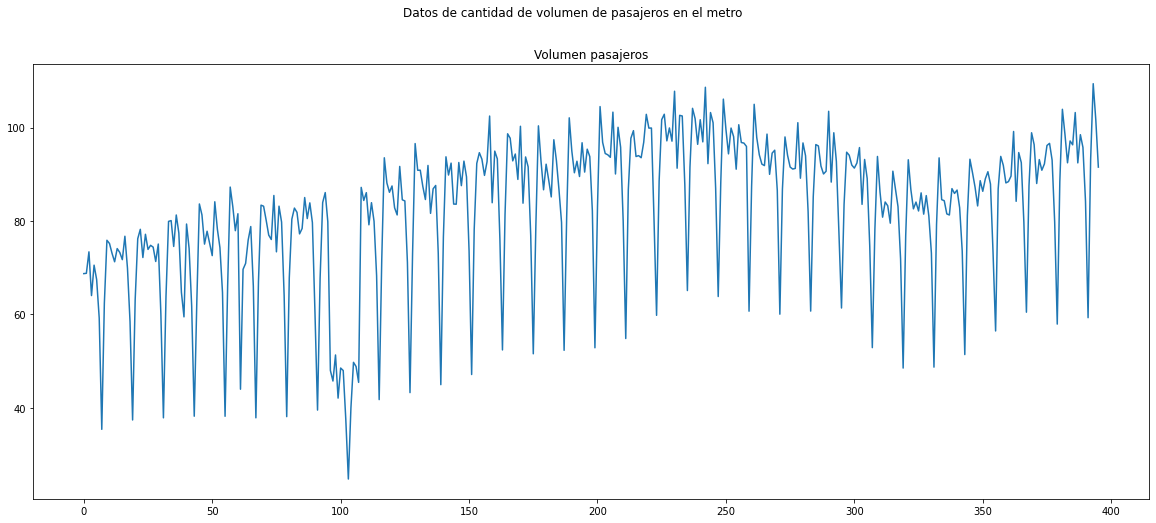

In [48]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1,1,figsize=(20,8))
fig.suptitle("Datos de cantidad de volumen de pasajeros en el metro")
ax1.plot(metro['Total viajeros'])
ax1.set_title('Volumen pasajeros')
fig.show()

In [49]:
final.to_csv('../data/dfFinal.csv', index =False)